The Copernicus Sentinel satellites are an amazing opportunity for everyone to use satellite data at unprecendented spacial and temporal resolution. One of the five Sentinel satellites in orbit is covering any given location in Europe every day.

The Copernicus Open Access Hub is the only source where everyone can access these rapidly growing archives. The fast growing archives are presenting us with the unique problem that we now have too much freely available satellite data. The question is not anymore *if* there is enough satellite data but *how* to find the data you need in a multi-petabyte database?

This is the first post in a series of tutorials showing you how to search, filter and download Copernicus sentinel satellite data using the Python package `sentinelsat`.

The other tutorials can be found here:

- [01 search and download](redo old tutorial)
- [02 visualize metadata](this one)
- [03 filtering and sorting](based on sentinelsat docu)

The topic on this tutorial is: **What metadata is available and how to visualize it**.

We will continue with the same basic set-up as in {tutorial 1]() and have a look at the available Sentinel-2 data for Germany in 2016 and 2017. 

### Set-up imports.

In [1]:
# basic sentinelsat functionality
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

# analysis and visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Set credentials and DHuS endpoint.

For this tutorial we are chosing the standard Copenricus Open Access Hub, but you can use any DHuS endpoint, such as [National Copernicus Mirrors](inlude link to awesome-sentinel)

In [7]:
api = SentinelAPI('username', 'password', "https://scihub.copernicus.eu/apihub")

Query available Sentinel-2 scenes for 2016 and 2017 covering Germany.

In [3]:
footprint = geojson_to_wkt(read_geojson('Deutschland.geojson'))  # GeoJSOn Polygon covering Germany

In [8]:
products2016 = api.query(area=footprint,
                     date=("20160101", "20161231"),  # date range to query
                     platformname='Sentinel-2')  # select data by SciHub keyword

Querying products: 100%|████████████| 2560/2560 [00:53<00:00, 30.73 products/s]


In [9]:
products2017 = api.query(area=footprint,
                     date=("20170101", "20171231"),
                     platformname='Sentinel-2')

Querying products: 100%|████████████| 8467/8467 [03:12<00:00, 39.39 products/s]


Convert dictionary to Pandas DataFrame for further analysis.

In [10]:
products2016_df = api.to_dataframe(products2016)
products2017_df = api.to_dataframe(products2017)

Number and size of available products.

In [11]:
products2016_df.iloc[0,:]

footprint                   POLYGON ((7.519963108381914 52.67977250612419,...
title                       S2A_OPER_PRD_MSIL1C_PDMC_20161101T193359_R108_...
size                                                                597.43 MB
filename                    S2A_OPER_PRD_MSIL1C_PDMC_20161101T193359_R108_...
instrumentname                                      Multi-Spectral Instrument
platformidentifier                                                  2015-000A
gmlfootprint                <gml:Polygon srsName="http://www.opengis.net/g...
endposition                                               2016-11-01 10:32:02
processinglevel                                                      Level-1C
link_icon                   https://scihub.copernicus.eu/apihub/odata/v1/P...
instrumentshortname                                                       MSI
cloudcoverpercentage                                                  99.5907
platformname                                                    

In [13]:
print("Number of available products 2016:", len(products2016_df))
print("Size 2016:", api.get_products_size(products2016), "GB")
print("---")
print("Number of available products 2017:", len(products2017_df))
print("Size 2017:", api.get_products_size(products2017), "GB")

Number of available products 2016: 2560
Size 2016: 4475.1 GB
---
Number of available products 2017: 8467
Size 2017: 4927.53 GB


We see 2017 has a lot more products, but about the same volume in regard to filesize. This is due to a change in the Sentinel-2 product format, which is now delivered in more but smaller datasets.

Cloud cover histogram. Analyze the distribution of cloud coverage on scene basis.

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
products2016_df["cloudcoverpercentage"].median()

79.9932

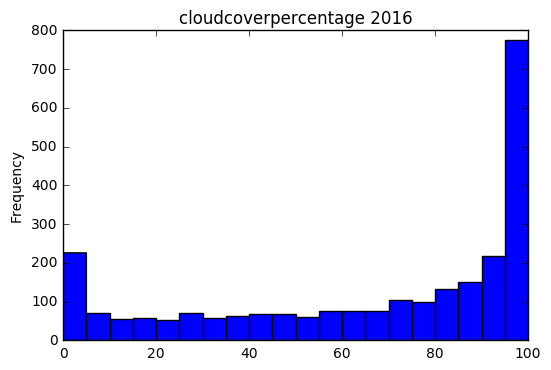

In [27]:
products2016_df["cloudcoverpercentage"].plot(kind="hist", bins=20, title="cloudcoverpercentage 2016")

In [83]:
products2017_df["cloudcoverpercentage"].median()

73.4295755

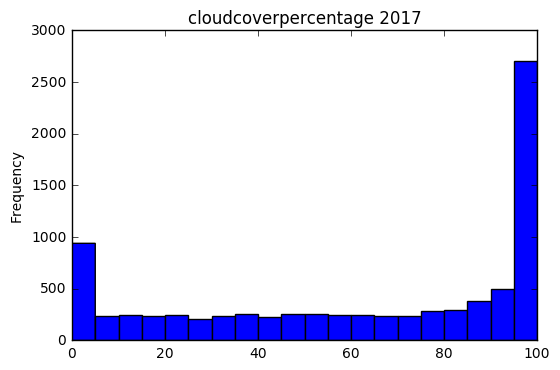

In [28]:
products2017_df["cloudcoverpercentage"].plot(kind="hist", bins=20, title="cloudcoverpercentage 2017")

Temporal distribution of scenes. Amount of scenes per month.

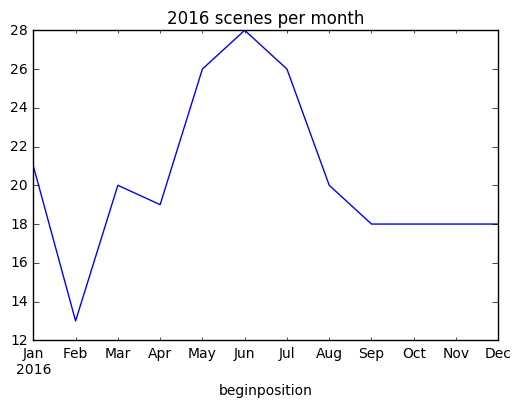

In [45]:
products2016_df.groupby(by="beginposition")["filename"].count().resample("MS").size().plot(title="2016 scenes per month")

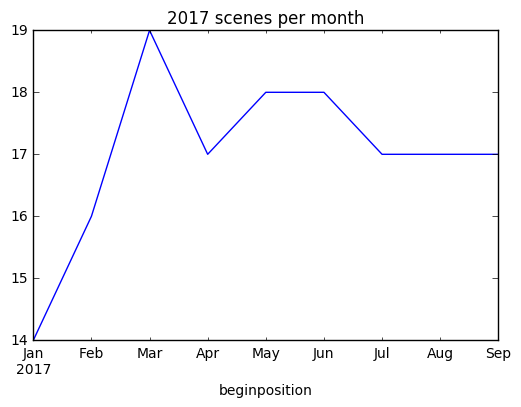

In [46]:
products2017_df.groupby(by="beginposition")["filename"].count().resample("MS").size().plot(title="2017 scenes per month")

Group cloud coverage by acquisition date and resample to monthly median.

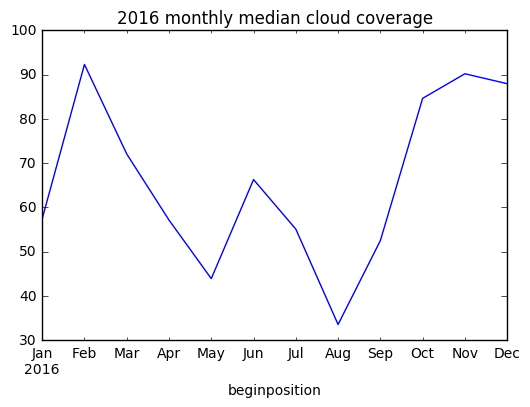

In [75]:
cloud2016 = pd.Series(data=products2016_df["cloudcoverpercentage"].values, index=products2016_df["beginposition"]).resample("MS").median()
cloud2016.plot(title="2016 monthly median cloud coverage")

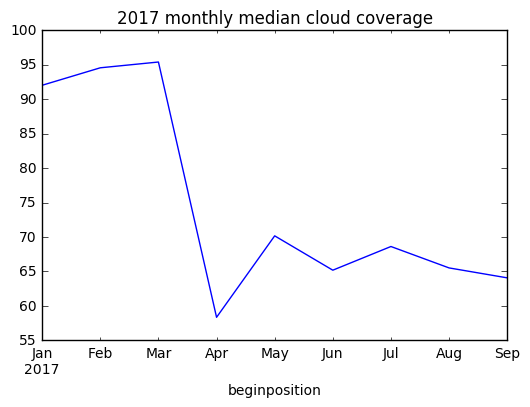

In [81]:
cloud2017 = pd.Series(data=products2017_df["cloudcoverpercentage"].values, index=products2017_df["beginposition"]).resample("MS").median()
cloud2017.plot(title="2017 monthly median cloud coverage")